In [1]:
import torch
from torchvision import transforms

from _models import CoordinateCNN, CoordinateDataset, visualize_prediction

# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model: CoordinateCNN = CoordinateCNN().to(device)

model.load_state_dict(torch.load("./checkpoint.pt", weights_only=True))

# Define transformations (without normalization for images)
transform: transforms.Compose = transforms.Compose(
    [
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
    ]
)

In [ ]:
imageId: str = "000000005"

coords: torch.Tensor = CoordinateDataset.load_coordinates(
    f"train/base/labels/{imageId}.txt"
)

visualize_prediction(f"train/base/images/{imageId}.png", model, transform, coords)

In [ ]:
testImage: str = "000000000.png"

visualize_prediction(f"val/images/{testImage}", model, transform)

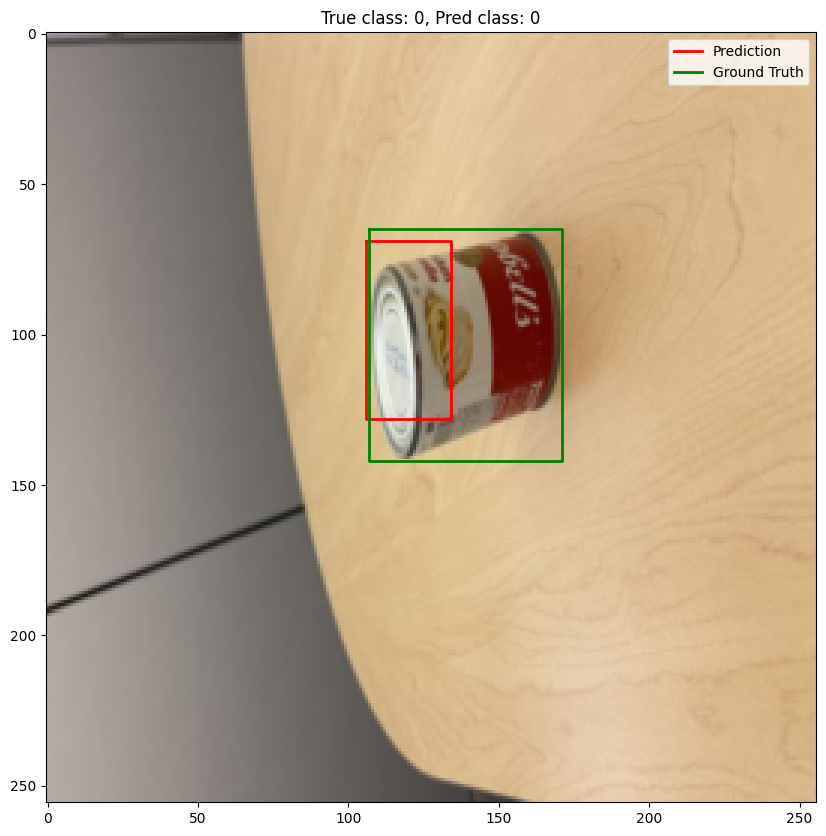

{'original_size': (640, 640),
 'prediction': array([0.00253771, 0.47198337, 0.3856719 , 0.10984079, 0.23042402],
       dtype=float32)}

In [2]:
coords: torch.Tensor = CoordinateDataset.load_coordinates(
    f"annotated_real_data/labels/IMG_9662_png.rf.91005e96f5b11af40c6171b9e495ce5d.txt"
)
visualize_prediction(
    f"annotated_real_data/images/IMG_9662_png.rf.91005e96f5b11af40c6171b9e495ce5d.jpg",
    model,
    transform,
    coords,
)